In [2]:
import pandas as pd

df  = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
pip install statsmodels



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.8 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.8 MB 563.7 kB/s eta 0:00:18
   ---------------------------------------- 0.1/9.8 MB 492.8 kB/s eta 0:00:20
    --------------------------------------- 0.1/9.8 MB 516.7 kB/s eta 0:00:19
    --------------------------------------- 0.1/9.8 MB 532.5 kB/s eta 0:00:19
    --------------------------------------- 0.2/9.8 MB 525.1 kB/s eta 0:00:19
    --------------------------------------- 0.2/9.8 MB 484.9 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.8 MB 529.7 kB/s eta 0:00:19
    --------------------------------------- 0.2/9.8 MB 515.5 kB/s eta 0:00:19
   - -------------------------------------- 0.3/9.8 MB 512.0 kB/s eta 0:00:19
   - -------------------------------------- 0.3/9.8 MB 542.9 kB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### ADF Test

In [9]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['Passengers'])

 

(np.float64(0.8153688792060482),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [10]:
df['Passengers'].diff()
 

0       NaN
1       6.0
2      14.0
3      -3.0
4      -8.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 144, dtype: float64

In [12]:
X = df['Passengers'].diff().dropna()
X

1       6.0
2      14.0
3      -3.0
4      -8.0
5      14.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 143, dtype: float64

In [13]:
adfuller(X)

(np.float64(-2.8292668241699994),
 np.float64(0.0542132902838255),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(988.5069317854084))

##### Here we get the Stationary data after the doing differences to get the stationary data during ADF test on the dataset

In [14]:
X

1       6.0
2      14.0
3      -3.0
4      -8.0
5      14.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 143, dtype: float64

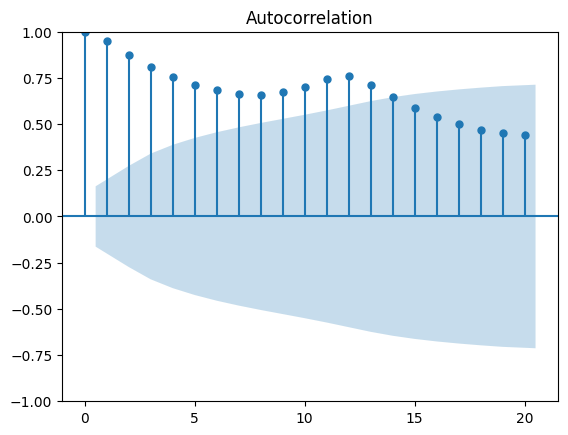

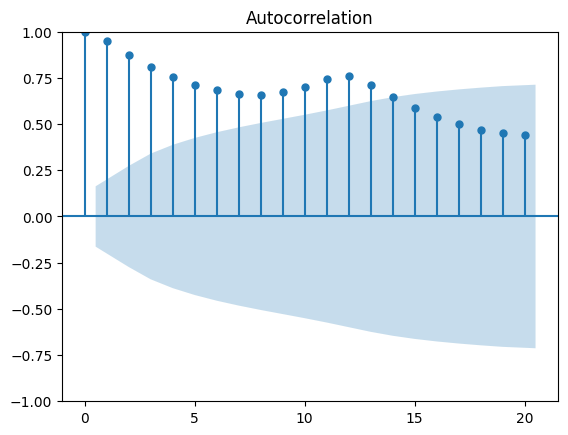

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(df['Passengers'], lags=20)

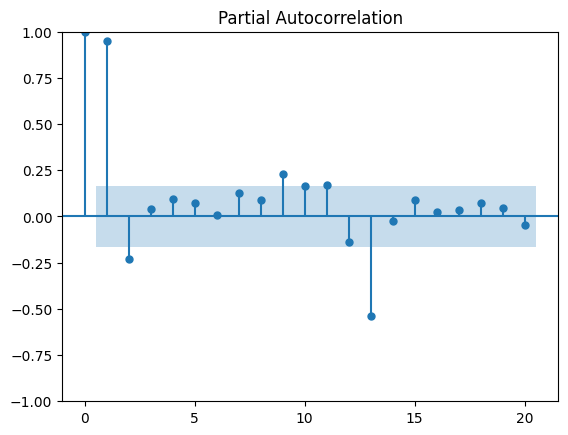

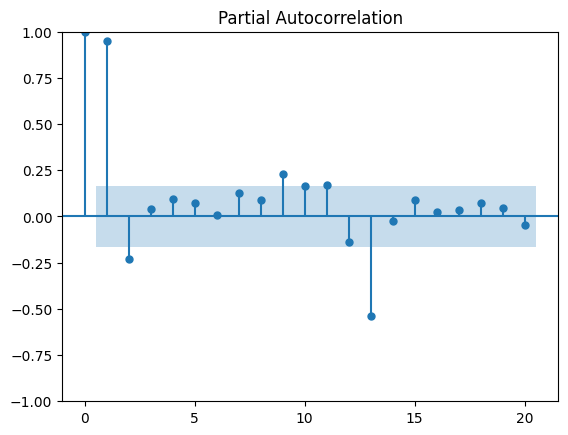

In [17]:
plot_pacf(df['Passengers'], lags=20)

In [25]:
from statsmodels.tsa.arima.model import ARIMA
 
ar = ARIMA(df['Passengers'],order=(2,1,1))

ar = ar.fit()

ar.forecast(steps=12)

144    471.000383
145    492.998177
146    497.918890
147    492.528738
148    484.243730
149    477.843463
150    474.914377
151    474.849500
152    476.211067
153    477.727786
154    478.716191
155    479.052519
Name: predicted_mean, dtype: float64